In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dtrain = pd.read_csv(r'E:\Self_learning\Projects\house-prices-advanced-regression-techniques\train.csv')
dtest = pd.read_csv(r'E:\Self_learning\Projects\house-prices-advanced-regression-techniques\test.csv')

In [4]:
dtrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
dtest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
print('Train_data: ',dtrain.shape)
print('Test_data: ', dtest.shape)

Train_data:  (1460, 81)
Test_data:  (1459, 80)


In [7]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Dealing with missing values

In [9]:
total = dtrain.isnull().sum().sort_values(ascending = False)
total.head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [10]:
# Columns where NaN values have missing 

cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']


# Replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    dtrain[col].fillna('None',inplace=True)
    dtest[col].fillna('None',inplace=True)

In [11]:
dtrain.isnull().sum().sort_values(ascending = False)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
KitchenAbvGr      0
               ... 
ExterQual         0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 81, dtype: int64

In [12]:
# Fillna with mean for the remaining columns : LotFrontage, GarageYrBlt, MasVnrArea

dtrain.fillna(dtrain.mean(), inplace = True)
dtest.fillna(dtrain.mean(), inplace = True)

In [13]:
dtrain.isnull().sum().sum()

0

In [14]:
dtest.isnull().sum().sum()

0

# Distribution Of SalePrice (Target Variable)

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

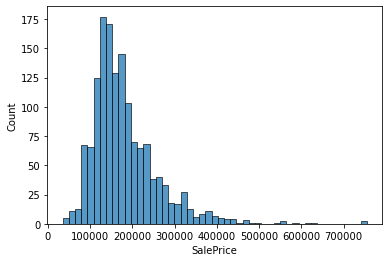

In [15]:
# Skewness mesaure the symmetry (Lack of Symmetry)
# Normal skewness = Mean = Median = Mode
# Positive skewness = Mean > Median > Mode
# Negative skewness = Mode > Median > Mean

# Skewness Coefficient = "(Mean - Mode) / Standard Deviation"

# Skewness btw -0.5 - 0.5 (The Data Is Nearky Symmertrical)
# Skewness btw '-1 - -0.5' (+ve skw) OR '0.5 - 1' (-ve skw) (The Data Is Slightly Skewed)
# Skewness lower than '-1' (-ve skw) OR greater than 1 (+ve skw) (The Data Is Extreamly Skewed)

print('Skewness: ', dtrain['SalePrice'].skew())

# Kurtosis measure the data is Heavey Tailed(Leptokrutic) or Light Tailed(Platykurtic) 
# relative to a normal distribution(Mesokurtic).

# lepo(Long) = kurtosis > 3
# Meso = kurtosis = 3
# Platy(Short) = kurtosis < 3

print('Kurtosis: ', dtrain["SalePrice"].kurt())

sns.histplot(dtrain['SalePrice'])

Skewness:  0.12133506220520406
Kurtosis:  0.8095319958036296


<AxesSubplot:xlabel='SalePrice_lg', ylabel='Density'>

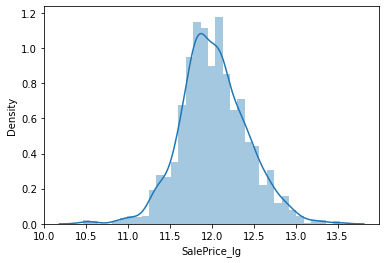

In [16]:
# The skewness is positive but extramly skewed and kurtosis has positive long tail. 

# Log-Tranformation(Feature Engineering) to make skewed data to normal distribution
# Log(x+1)
# Log_tranformation only work on positive skewness.

dtrain['SalePrice_lg'] = np.log(dtrain['SalePrice'])

print('Skewness: ', dtrain['SalePrice_lg'].skew())
print('Kurtosis: ', dtrain['SalePrice_lg'].kurt())

dtrain.drop('SalePrice', axis = 1, inplace = True)

sns.distplot(dtrain['SalePrice_lg'])

# Saprating Numerical & Categorical Features

In [17]:
num_feat = dtrain.dtypes[dtrain.dtypes != 'object'].index
print('Number of Numerical Features: ', len(num_feat))

dtrain[num_feat].columns

Number of Numerical Features:  38


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice_lg'],
      dtype='object')

In [18]:
cat_feat = dtrain.dtypes[dtrain.dtypes == 'object'].index
print('Number of Categorical Features: ', len(cat_feat))

dtrain[cat_feat].columns

Number of Categorical Features:  43


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Checking all Features Distribution

In [19]:
for col in num_feat:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(dtrain[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(dtrain[col].kurt())  
         )

Id              Skewness: 00.00     Kurtosis: -01.20
MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.38     Kurtosis: 021.85
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.68     Kurtosis: 010.15
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 

Skewness:  1.3665603560164552
Kurtosis:  4.895120580693174


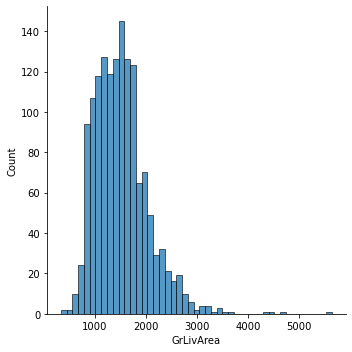

In [20]:
print('Skewness: ', dtrain['GrLivArea'].skew())
print('Kurtosis: ', dtrain['GrLivArea'].kurt())

sns.displot(dtrain['GrLivArea'])

Skewness:  12.207687851233496
Kurtosis:  203.24327101886033


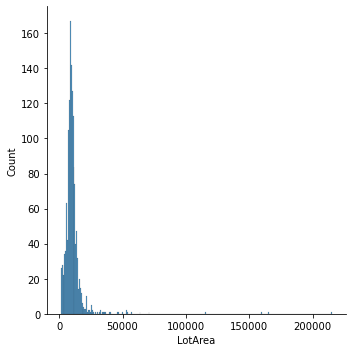

In [21]:
print('Skewness: ', dtrain['LotArea'].skew())
print('Kurtosis: ', dtrain['LotArea'].kurt())

sns.displot(dtrain['LotArea'])

In [22]:
for df in [dtrain, dtest]:
    df['GrLivArea_lg'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace = True, axis = 1)
    df['LotArea_lg'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace = True, axis = 1)
    
num_feat = dtrain.dtypes[dtrain.dtypes != 'object'].index

Skewness:  -0.006995182187690808
Kurtosis:  0.28260268850118564


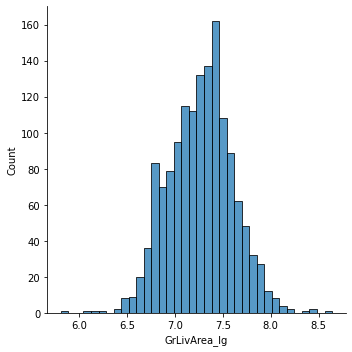

In [23]:
print('Skewness: ', dtrain['GrLivArea_lg'].skew())
print('Kurtosis: ', dtrain['GrLivArea_lg'].kurt())

sns.displot(dtrain['GrLivArea_lg'])

Skewness:  -0.1379938086958118
Kurtosis:  4.713358369108622


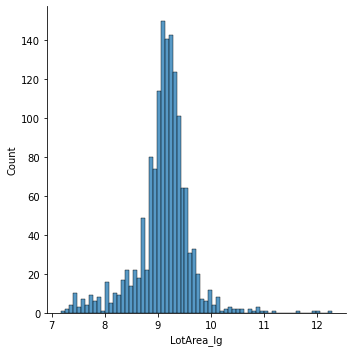

In [24]:
print('Skewness: ', dtrain['LotArea_lg'].skew())
print('Kurtosis: ', dtrain['LotArea_lg'].kurt())

sns.displot(dtrain['LotArea_lg'])

# Relation To SalePrice To All Numrical Features|

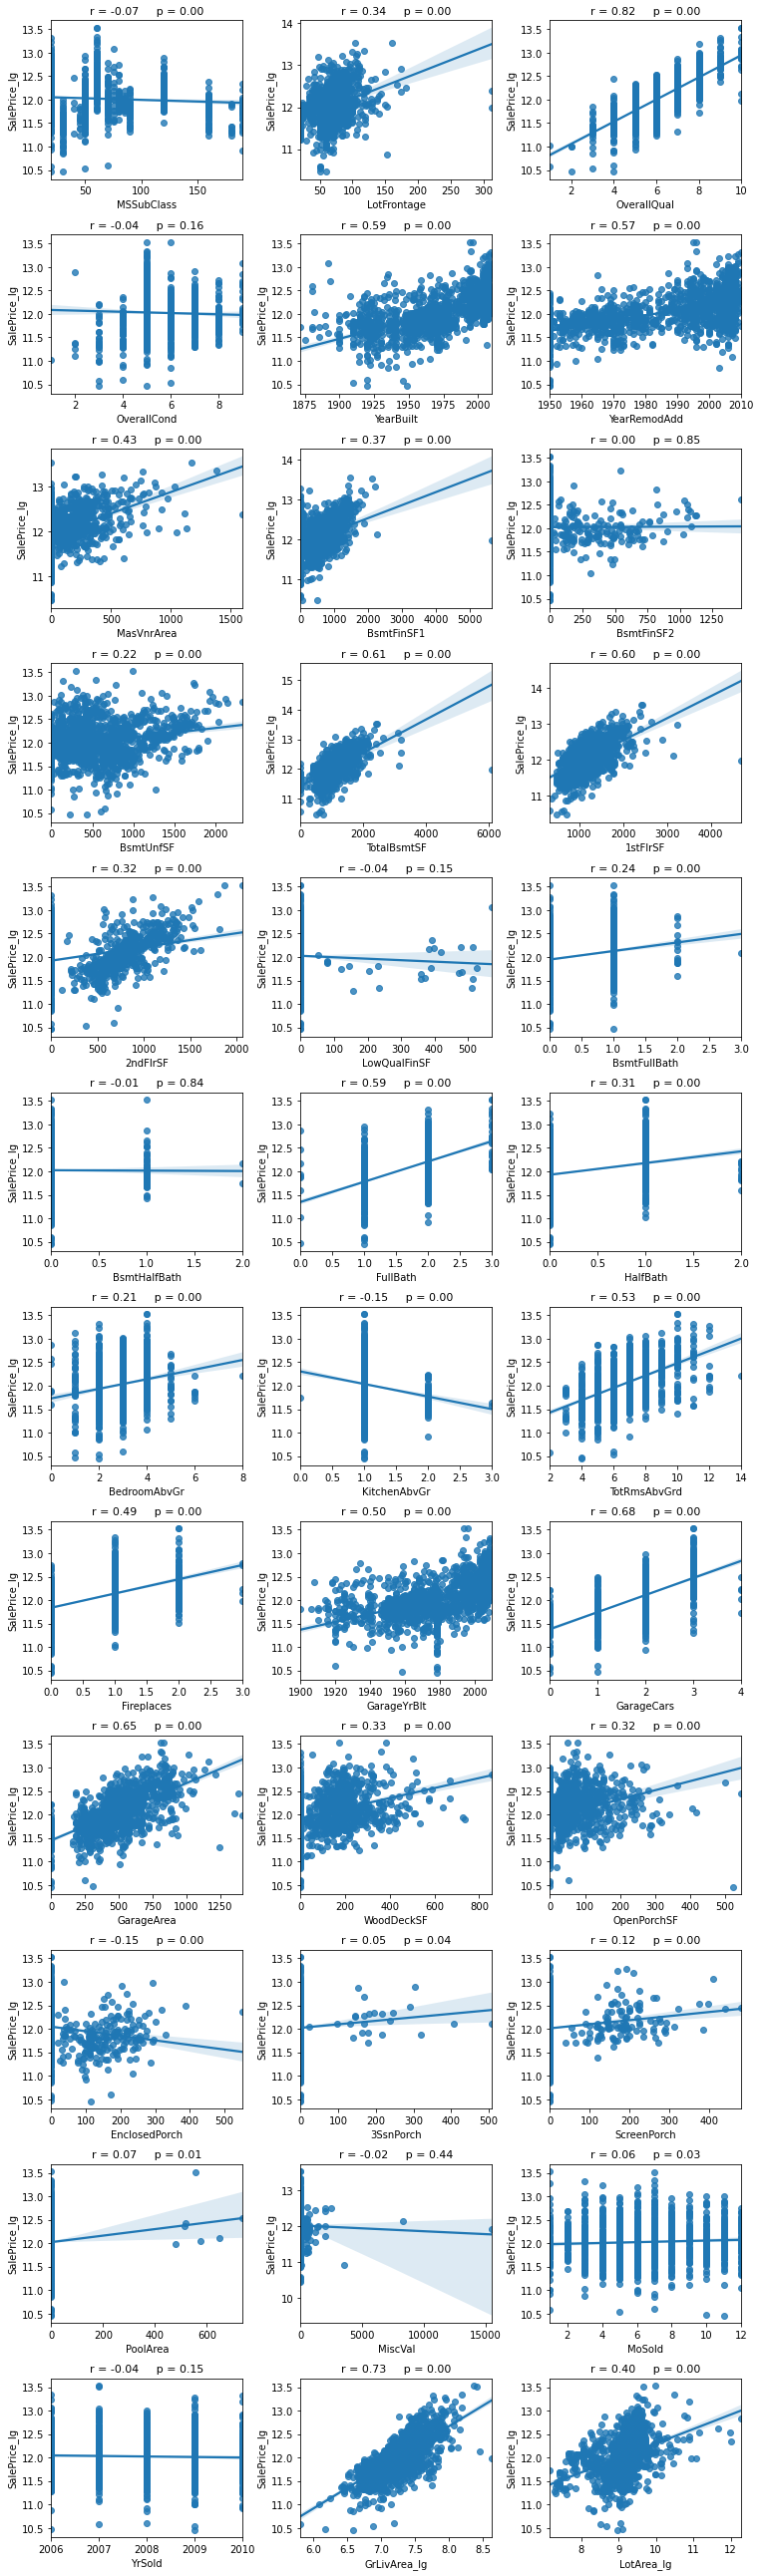

In [25]:
nr_row = 12
nr_col = 3
fig, axs = plt.subplots(nr_row, nr_col, figsize = (nr_col * 3.5, nr_row * 3))

num_feat_list = list(num_feat)
except_feat = ['Id', 'SalePrice_lg', 'SalePrice']

plot_list = [c for c in list(num_feat) if c not in except_feat]

from scipy import stats

for r in range(0, nr_row):
    for c in range(0, nr_col):
        i = r * nr_col + c
        if i < len(plot_list):
            sns.regplot(x = dtrain[plot_list[i]], y = dtrain['SalePrice_lg'], ax = axs[r][c])
            
            stp = stats.pearsonr(dtrain[plot_list[i]], dtrain['SalePrice_lg'])
            
            str_title = 'r = ' + "{0:.2f}".format(stp[0]) + '     ' 'p = ' + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize = 11)

plt.tight_layout()
plt.show()

### Outliers

In [26]:
dtrain = dtrain.drop(dtrain[(dtrain['OverallQual'] == 10) & (dtrain['SalePrice_lg'] < 12.3)].index)

In [27]:
dtrain = dtrain.drop(dtrain[(dtrain['GrLivArea_lg'] > 8.3) & (dtrain['SalePrice_lg'] < 12.5)].index)

In [28]:

corr = dtrain.corr()
corr_abs = corr.abs()

nr_num_cols = len(num_feat)
ser_corr = corr_abs.nlargest(nr_num_cols, 'SalePrice_lg')['SalePrice_lg']

cols_abv_corr_limit = list(ser_corr[ser_corr.values > 0.4].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= 0.4].index)

In [29]:
print(ser_corr)

SalePrice_lg     1.000000
OverallQual      0.821404
GrLivArea_lg     0.737427
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
LotArea_lg       0.402814
BsmtFinSF1       0.392283
LotFrontage      0.352432
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
MiscVal          0.020012
Id               0.017774
BsmtHalfBath     0.005124
BsmtFinSF2       0.004863
Name: SalePr

In [30]:
print('List of numerical features with r above 0.4:', cols_abv_corr_limit)

List of numerical features with r above 0.4: ['SalePrice_lg', 'OverallQual', 'GrLivArea_lg', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'LotArea_lg']


### Relation between SalePrice to all categorial features

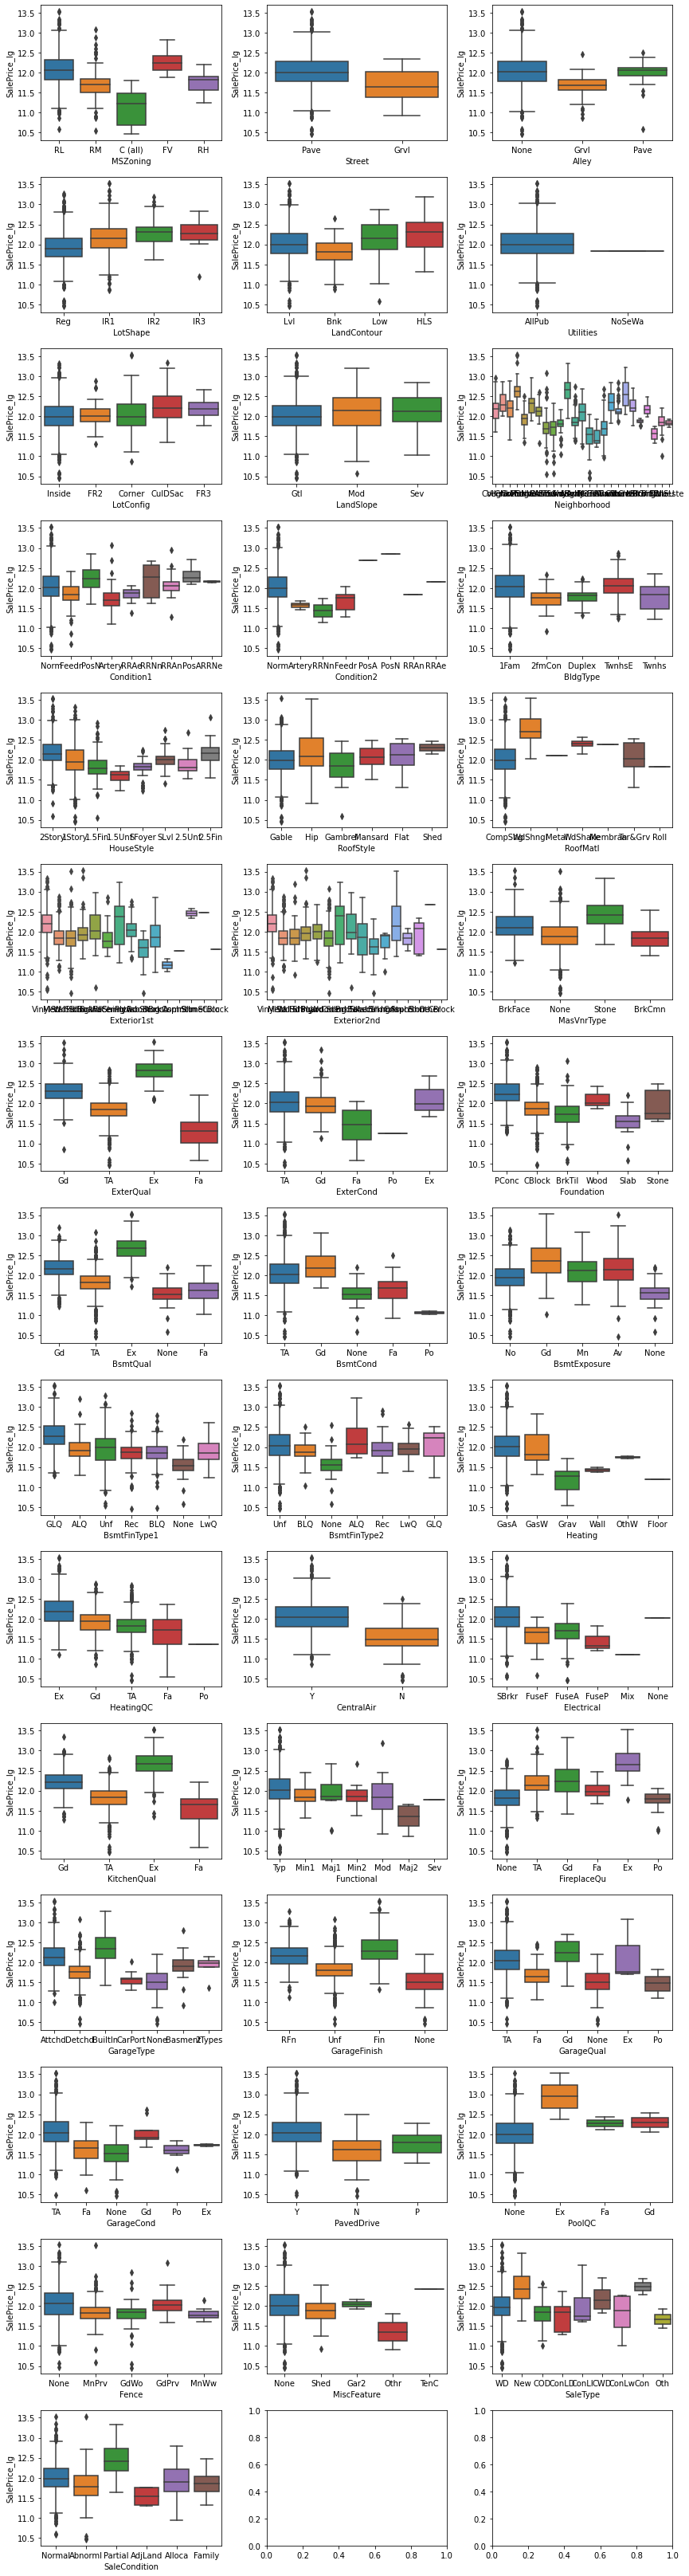

In [31]:
li_cat_feats = list(cat_feat)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y='SalePrice_lg', data=dtrain, ax = axs[r][c])
    
plt.tight_layout()    
plt.show() 

In [32]:
# Strong categorical Correlation:
#'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
#'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType'

# Weak Categorical Correlation:
#'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
#'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
#'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
#'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
#'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
#'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature','SaleCondition'

In [33]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

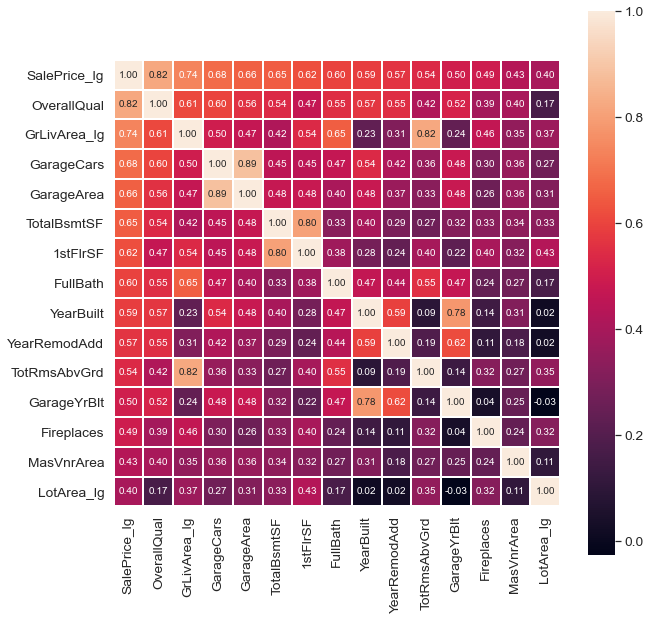

In [34]:
nr_feats = len(cols_abv_corr_limit)
plot_corr_matrix(dtrain, nr_feats, 'SalePrice_lg')

# Data Wrangling 

#### Droping all columns with weak correlation to salePrice

In [35]:
catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle',
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation',
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
                  'MiscFeature','SaleCondition']

id_test = dtest['Id']

to_drop_num = cols_bel_corr_limit
to_drop_catg = catg_weak_corr

cols_to_drop = ['Id'] + to_drop_num + to_drop_catg

for df in [dtrain, dtest]:
    df.drop(cols_to_drop, inplace = True, axis = 1)

In [36]:
dtrain.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,...,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType,SalePrice_lg,GrLivArea_lg,LotArea_lg
0,RL,CollgCr,Norm,7,2003,2003,BrkFace,196.0,Gd,Gd,...,Gd,8,0,2003.0,2,548,WD,12.247694,7.444249,9.041922
1,RL,Veenker,Norm,6,1976,1976,None,0.0,TA,Gd,...,TA,6,1,1976.0,2,460,WD,12.109011,7.140453,9.169518
2,RL,CollgCr,Norm,7,2001,2002,BrkFace,162.0,Gd,Gd,...,Gd,6,1,2001.0,2,608,WD,12.317167,7.487734,9.328123
3,RL,Crawfor,Norm,7,1915,1970,None,0.0,TA,TA,...,Gd,7,1,1998.0,3,642,WD,11.849398,7.448334,9.164296
4,RL,NoRidge,Norm,8,2000,2000,BrkFace,350.0,Gd,Gd,...,Gd,9,1,2000.0,3,836,WD,12.429216,7.695303,9.565214


In [37]:
dtest.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType,GrLivArea_lg,LotArea_lg
0,RH,NAmes,Norm,5,1961,1961,None,0.0,TA,TA,...,1,TA,5,0,1961.0,1.0,730.0,WD,6.797940,9.360655
1,RL,NAmes,Norm,6,1958,1958,BrkFace,108.0,TA,TA,...,1,Gd,6,0,1958.0,1.0,312.0,WD,7.192182,9.565704
2,RL,Gilbert,Norm,5,1997,1998,None,0.0,TA,Gd,...,2,TA,6,1,1997.0,2.0,482.0,WD,7.395722,9.534595
3,RL,Gilbert,Norm,6,1998,1998,BrkFace,20.0,TA,TA,...,2,Gd,7,1,1998.0,2.0,470.0,WD,7.380256,9.208138
4,RL,StoneBr,Norm,8,1992,1992,None,0.0,Gd,Gd,...,2,Gd,5,0,1992.0,2.0,506.0,WD,7.154615,8.518193


#### Convert Categorical features to Numerical Features

In [38]:
catg_strong_corr = ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType',
                    'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_strong_corr.remove('Neighborhood')

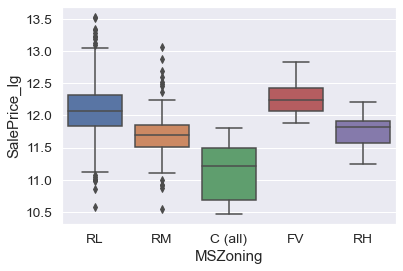

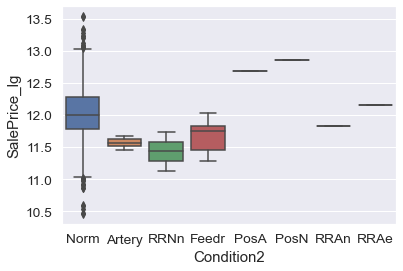

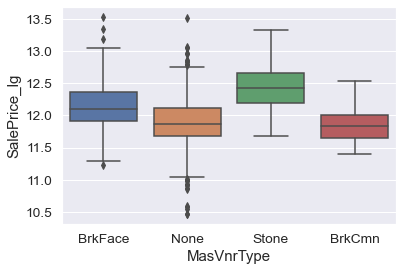

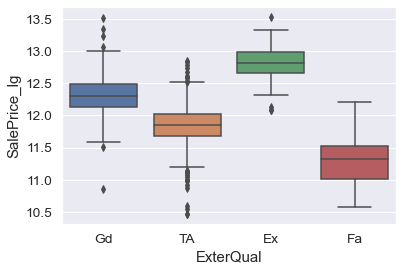

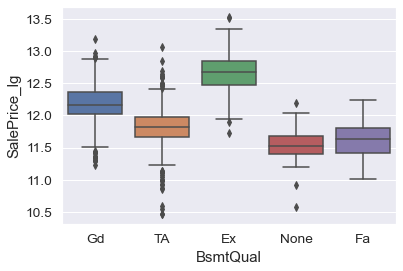

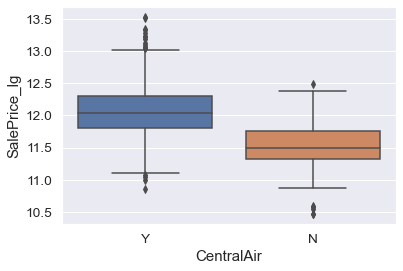

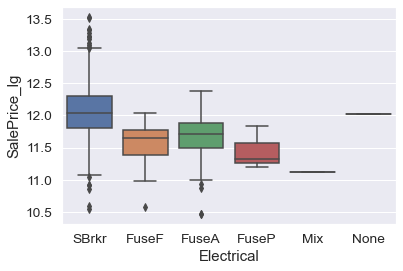

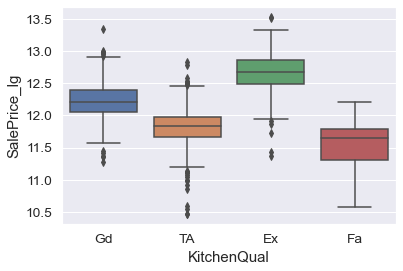

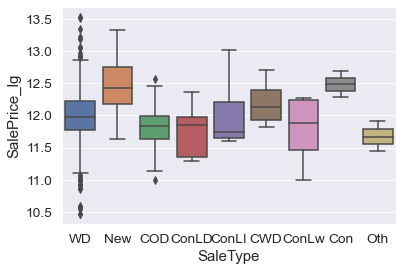

In [39]:
# Categorical distribution plots

for catg in catg_strong_corr:
    sns.boxplot(x = catg, y = 'SalePrice_lg', data = dtrain)
    plt.show()

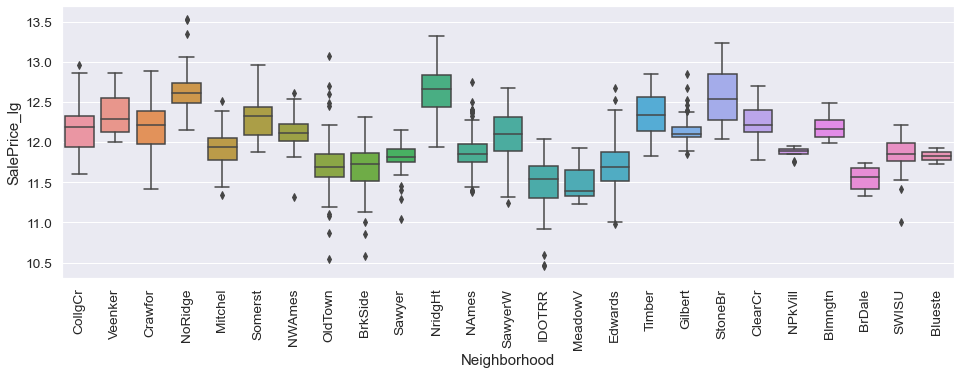

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(16,5)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice_lg', data = dtrain, ax = ax)
plt.xticks(rotation = 90)
plt.show()

In [41]:
for catg in catg_strong_corr:
    g = dtrain.groupby(catg)['SalePrice_lg'].mean()
    print(g)

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085939
RM         11.692893
Name: SalePrice_lg, dtype: float64
Condition2
Artery    11.570036
Feedr     11.670631
Norm      12.025925
PosA      12.691580
PosN      12.860999
RRAe      12.154779
RRAn      11.827043
RRNn      11.435329
Name: SalePrice_lg, dtype: float64
MasVnrType
BrkCmn     11.853239
BrkFace    12.163630
None       11.896884
Stone      12.431016
Name: SalePrice_lg, dtype: float64
ExterQual
Ex    12.792412
Fa    11.304541
Gd    12.311282
TA    11.837985
Name: SalePrice_lg, dtype: float64
BsmtQual
Ex      12.650235
Fa      11.617600
Gd      12.179882
None    11.529680
TA      11.810855
Name: SalePrice_lg, dtype: float64
CentralAir
N    11.491858
Y    12.061099
Name: SalePrice_lg, dtype: float64
Electrical
FuseA    11.660315
FuseF    11.539624
FuseP    11.446808
Mix      11.112448
None     12.028739
SBrkr    12.061474
Name: SalePrice_lg, dtype: float64
KitchenQual
Ex    12.645425
Fa    11

In [42]:
# 'MSZoning'
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV'] 


# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']

In [43]:
for df in [dtrain, dtest]:
    
    df['MSZ_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_catg2) ), 'MSZ_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_catg3) ), 'MSZ_num'] = 3        
    
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3    

    df['Cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(cond2_catg2) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(cond2_catg3) ), 'Cond2_num'] = 3    
    
    df['Mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['SlTy_num'] = 2       
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1  
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3  
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4  

#### Checking Correlation to SalePrice for the new numerical columns

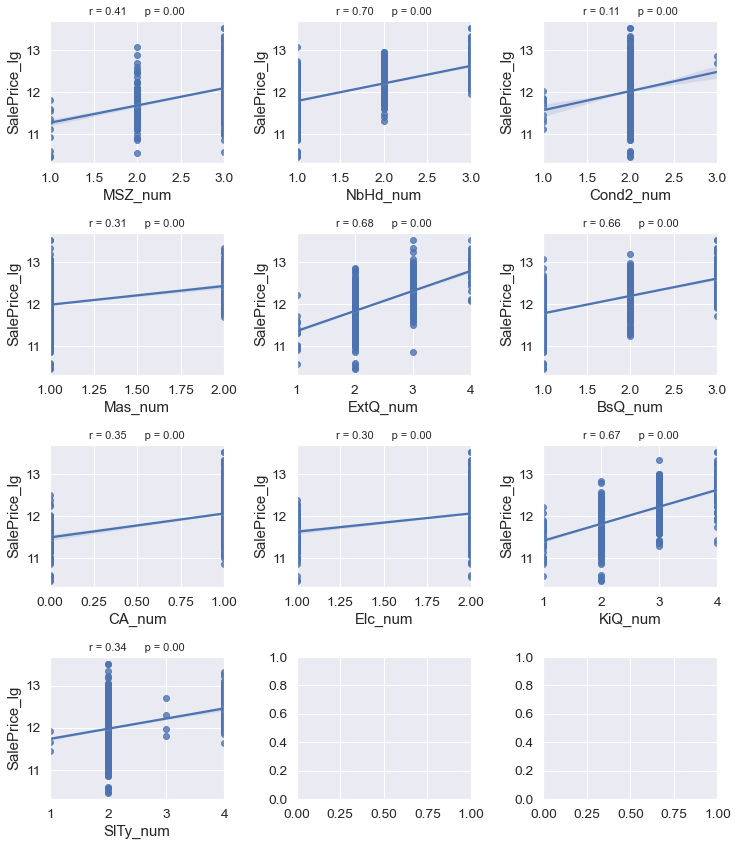

In [44]:
new_col_num = ['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']

nr_rows = 4
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(new_col_num):
            sns.regplot(dtrain[new_col_num[i]], dtrain['SalePrice_lg'], ax = axs[r][c])
            stp = stats.pearsonr(dtrain[new_col_num[i]], dtrain['SalePrice_lg'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()

#### Dropping the converted categorical columns and the new numerical columns with weak correlation 

In [45]:
# Columns and correlation before dropping.

catg_cols_to_drop = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual',
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

corr1 = dtrain.corr()
corr_abs_1 = corr1.abs()

nr_all_cols = len(dtrain)
ser_corr_1 = corr_abs_1.nlargest(nr_all_cols, 'SalePrice_lg')['SalePrice_lg']

print(ser_corr_1)

cols_bel_corr_limit_1 = list(ser_corr_1[ser_corr_1.values <= 0.4].index)  #min_val_corr = 0.4

for df in [dtrain, dtest]:
    df.drop(catg_cols_to_drop, inplace = True, axis = 1)
    df.drop(cols_bel_corr_limit_1, inplace = True, axis = 1)

SalePrice_lg    1.000000
OverallQual     0.821404
GrLivArea_lg    0.737427
NbHd_num        0.696962
ExtQ_num        0.682225
GarageCars      0.681033
KiQ_num         0.669989
BsQ_num         0.661286
GarageArea      0.656128
TotalBsmtSF     0.647563
1stFlrSF        0.620500
FullBath        0.595899
YearBuilt       0.587043
YearRemodAdd    0.565992
TotRmsAbvGrd    0.537702
GarageYrBlt     0.500842
Fireplaces      0.491998
MasVnrArea      0.433353
MSZ_num         0.409423
LotArea_lg      0.402814
CA_num          0.351598
SlTy_num        0.337469
Mas_num         0.313280
Elc_num         0.304857
Cond2_num       0.107610
Name: SalePrice_lg, dtype: float64


In [46]:
# Columns and correlation after dropping.
corr2 = dtrain.corr()
corr_abs_2 = corr2.abs()

nr_all_cols = len(dtrain)
ser_corr_2 = corr_abs_2.nlargest(nr_all_cols, 'SalePrice_lg')['SalePrice_lg']

print(ser_corr_2)

SalePrice_lg    1.000000
OverallQual     0.821404
GrLivArea_lg    0.737427
NbHd_num        0.696962
ExtQ_num        0.682225
GarageCars      0.681033
KiQ_num         0.669989
BsQ_num         0.661286
GarageArea      0.656128
TotalBsmtSF     0.647563
1stFlrSF        0.620500
FullBath        0.595899
YearBuilt       0.587043
YearRemodAdd    0.565992
TotRmsAbvGrd    0.537702
GarageYrBlt     0.500842
Fireplaces      0.491998
MasVnrArea      0.433353
MSZ_num         0.409423
LotArea_lg      0.402814
Name: SalePrice_lg, dtype: float64


#### New DataFrame

In [47]:
dtrain.head()

,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,...,GarageCars,GarageArea,SalePrice_lg,GrLivArea_lg,LotArea_lg,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,RL,7,2003,2003,196.0,856,856,2,8,0,...,2,548,12.247694,7.444249,9.041922,3,2,3,2,3
1,RL,6,1976,1976,0.0,1262,1262,2,6,1,...,2,460,12.109011,7.140453,9.169518,3,2,2,2,2
2,RL,7,2001,2002,162.0,920,920,2,6,1,...,2,608,12.317167,7.487734,9.328123,3,2,3,2,3
3,RL,7,1915,1970,0.0,756,961,1,7,1,...,3,642,11.849398,7.448334,9.164296,3,2,2,1,3
4,RL,8,2000,2000,350.0,1145,1145,2,9,1,...,3,836,12.429216,7.695303,9.565214,3,3,3,2,3


In [48]:
dtest.head()

,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GrLivArea_lg,LotArea_lg,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,RH,5,1961,1961,0.0,882.0,896,1,5,0,1961.0,1.0,730.0,6.797940,9.360655,2,1,2,1,2
1,RL,6,1958,1958,108.0,1329.0,1329,1,6,0,1958.0,1.0,312.0,7.192182,9.565704,3,1,2,1,3
2,RL,5,1997,1998,0.0,928.0,928,2,6,1,1997.0,2.0,482.0,7.395722,9.534595,3,2,2,2,2
3,RL,6,1998,1998,20.0,926.0,926,2,7,1,1998.0,2.0,470.0,7.380256,9.208138,3,2,2,1,3
4,RL,8,1992,1992,0.0,1280.0,1280,2,5,0,1992.0,2.0,506.0,7.154615,8.518193,3,3,3,2,3


### List of all Features with strong correlation to SalePrice_log
##### After Droping All Columns With Waek Correlation With Target Variable

In [49]:
corr = dtrain.corr()
corr_abs = corr.abs()

nr_all_cols = len(dtrain)
print(corr_abs.nlargest(nr_all_cols, 'SalePrice_lg')['SalePrice_lg'])

SalePrice_lg    1.000000
OverallQual     0.821404
GrLivArea_lg    0.737427
NbHd_num        0.696962
ExtQ_num        0.682225
GarageCars      0.681033
KiQ_num         0.669989
BsQ_num         0.661286
GarageArea      0.656128
TotalBsmtSF     0.647563
1stFlrSF        0.620500
FullBath        0.595899
YearBuilt       0.587043
YearRemodAdd    0.565992
TotRmsAbvGrd    0.537702
GarageYrBlt     0.500842
Fireplaces      0.491998
MasVnrArea      0.433353
MSZ_num         0.409423
LotArea_lg      0.402814
Name: SalePrice_lg, dtype: float64


### All Features With Strong Correlation to SalePrice (Feature Selection)

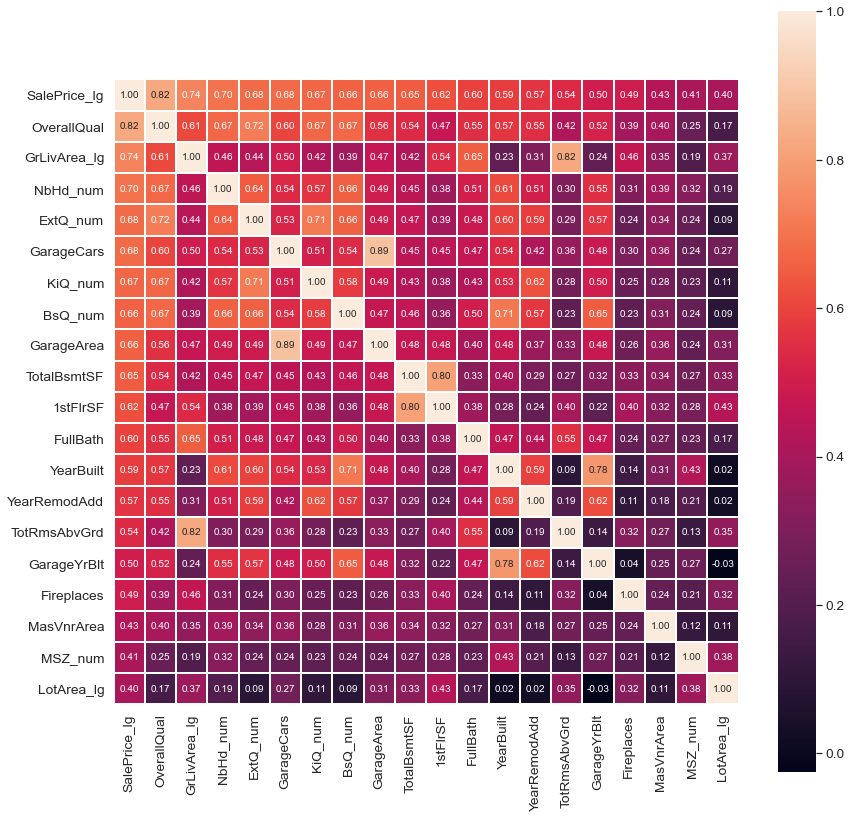

In [50]:
nr_feats = len(dtrain.columns)
plot_corr_matrix(dtrain, nr_feats, 'SalePrice_lg')

#### MULTICOLLINEARITY

##### Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model.

Strong correlation of these features to other, similar features:

'GrLivArea_Log' and 'TotRmsAbvGrd'

'GarageCars' and 'GarageArea'

'TotalBsmtSF' and '1stFlrSF'

'YearBuilt' and 'GarageYrBlt'

Of those features we drop the one that has smaller correlation coeffiecient to Target.

In [51]:
cols = corr_abs.nlargest(nr_all_cols, 'SalePrice_lg')['SalePrice_lg'].index
cols = list(cols)

# Dropping columns that are similar to others already used and show a high correlation to these     
drop_similar = 1

if drop_similar == 1:
    for col in ['GarageArea', '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt']:
        if col in cols:
            cols.remove(col)

In [52]:
cols = list(cols)
print(cols)

['SalePrice_lg', 'OverallQual', 'GrLivArea_lg', 'NbHd_num', 'ExtQ_num', 'GarageCars', 'KiQ_num', 'BsQ_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotArea_lg']


List of features used for the Regressors

In [53]:
feats = cols.copy()
feats.remove('SalePrice_lg')

print(feats)

['OverallQual', 'GrLivArea_lg', 'NbHd_num', 'ExtQ_num', 'GarageCars', 'KiQ_num', 'BsQ_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotArea_lg']


In [54]:
dtrain_ml = dtrain[feats].copy()
dtest_ml = dtest[feats].copy()

y = dtrain['SalePrice_lg']

### Combine Train and Test data

For one hot encoding (use pandas get dummies) of all categorical features
uncommenting the following cell increases the number of features
up to now, all models are optimized for not applying one hot encoder
when applied, GridSearchCV needs to be rerun

In [55]:
"""
all_data = pd.concat((dtrain[feats], dtest[feats]))

li_get_dummies = ['OverallQual', 'NbHd_num', 'GarageCars','ExtQ_num', 'KiQ_num',
                  'BsQ_num', 'FullBath', 'Fireplaces', 'MSZ_num']
all_data = pd.get_dummies(all_data, columns=li_get_dummies, drop_first=True)

df_train_ml = all_data[:dtrain.shape[0]]
df_test_ml  = all_data[dtrain.shape[0]:]
"""

"\nall_data = pd.concat((dtrain[feats], dtest[feats]))\n\nli_get_dummies = ['OverallQual', 'NbHd_num', 'GarageCars','ExtQ_num', 'KiQ_num',\n                  'BsQ_num', 'FullBath', 'Fireplaces', 'MSZ_num']\nall_data = pd.get_dummies(all_data, columns=li_get_dummies, drop_first=True)\n\ndf_train_ml = all_data[:dtrain.shape[0]]\ndf_test_ml  = all_data[dtrain.shape[0]:]\n"

#### StandardScaler

In [56]:
# Standardize features by removing the mean and scaling to unit variance
# [Subtracting by Mean and then divide it by Standard Deviation]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dtrain_ml_sc = sc.fit_transform(dtrain_ml)
dtest_ml_sc = sc.fit_transform(dtest_ml)

In [57]:
dtrain_ml_sc = pd.DataFrame(dtrain_ml_sc)
dtrain_ml_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.658506,0.539624,0.658963,1.061109,0.313159,0.741127,0.648281,-0.473766,0.793546,1.052959,0.880362,-0.952231,0.521228,0.438861,-0.129585
1,-0.068293,-0.380198,0.658963,-0.689001,0.313159,-0.770150,0.648281,0.504925,0.793546,0.158428,-0.428115,0.605965,-0.574433,0.438861,0.118848
2,0.658506,0.671287,0.658963,1.061109,0.313159,0.741127,0.648281,-0.319490,0.793546,0.986698,0.831900,0.605965,0.331164,0.438861,0.427653
3,0.658506,0.551993,0.658963,-0.689001,1.652119,0.741127,-0.921808,-0.714823,-1.025620,-1.862551,-0.718888,0.605965,-0.574433,0.438861,0.108680
4,1.385305,1.299759,2.162512,1.061109,1.652119,0.741127,0.648281,0.222888,0.793546,0.953567,0.734975,0.605965,1.382104,0.438861,0.889271


#### Creating Datasets for ML Algorithms

In [58]:
dtrain_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1458 non-null   int64  
 1   GrLivArea_lg  1458 non-null   float64
 2   NbHd_num      1458 non-null   int64  
 3   ExtQ_num      1458 non-null   int64  
 4   GarageCars    1458 non-null   int64  
 5   KiQ_num       1458 non-null   int64  
 6   BsQ_num       1458 non-null   int64  
 7   TotalBsmtSF   1458 non-null   int64  
 8   FullBath      1458 non-null   int64  
 9   YearBuilt     1458 non-null   int64  
 10  YearRemodAdd  1458 non-null   int64  
 11  Fireplaces    1458 non-null   int64  
 12  MasVnrArea    1458 non-null   float64
 13  MSZ_num       1458 non-null   int64  
 14  LotArea_lg    1458 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 214.5 KB


In [59]:
dtest_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea_lg  1459 non-null   float64
 2   NbHd_num      1459 non-null   int64  
 3   ExtQ_num      1459 non-null   int64  
 4   GarageCars    1459 non-null   float64
 5   KiQ_num       1459 non-null   int64  
 6   BsQ_num       1459 non-null   int64  
 7   TotalBsmtSF   1459 non-null   float64
 8   FullBath      1459 non-null   int64  
 9   YearBuilt     1459 non-null   int64  
 10  YearRemodAdd  1459 non-null   int64  
 11  Fireplaces    1459 non-null   int64  
 12  MasVnrArea    1459 non-null   float64
 13  MSZ_num       1459 non-null   int64  
 14  LotArea_lg    1459 non-null   float64
dtypes: float64(5), int64(10)
memory usage: 171.1 KB


In [60]:
dtrain_ml.head()

,OverallQual,GrLivArea_lg,NbHd_num,ExtQ_num,GarageCars,KiQ_num,BsQ_num,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,MasVnrArea,MSZ_num,LotArea_lg
0,7,7.444249,2,3,2,3,2,856,2,2003,2003,0,196.0,3,9.041922
1,6,7.140453,2,2,2,2,2,1262,2,1976,1976,1,0.0,3,9.169518
2,7,7.487734,2,3,2,3,2,920,2,2001,2002,1,162.0,3,9.328123
3,7,7.448334,2,2,3,3,1,756,1,1915,1970,1,0.0,3,9.164296
4,8,7.695303,3,3,3,3,2,1145,2,2000,2000,1,350.0,3,9.565214


In [61]:
dtrain_ml_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.658506,0.539624,0.658963,1.061109,0.313159,0.741127,0.648281,-0.473766,0.793546,1.052959,0.880362,-0.952231,0.521228,0.438861,-0.129585
1,-0.068293,-0.380198,0.658963,-0.689001,0.313159,-0.770150,0.648281,0.504925,0.793546,0.158428,-0.428115,0.605965,-0.574433,0.438861,0.118848
2,0.658506,0.671287,0.658963,1.061109,0.313159,0.741127,0.648281,-0.319490,0.793546,0.986698,0.831900,0.605965,0.331164,0.438861,0.427653
3,0.658506,0.551993,0.658963,-0.689001,1.652119,0.741127,-0.921808,-0.714823,-1.025620,-1.862551,-0.718888,0.605965,-0.574433,0.438861,0.108680
4,1.385305,1.299759,2.162512,1.061109,1.652119,0.741127,0.648281,0.222888,0.793546,0.953567,0.734975,0.605965,1.382104,0.438861,0.889271


In [62]:
dtest_ml.head()

,OverallQual,GrLivArea_lg,NbHd_num,ExtQ_num,GarageCars,KiQ_num,BsQ_num,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,MasVnrArea,MSZ_num,LotArea_lg
0,5,6.797940,1,2,1.0,2,1,882.0,1,1961,1961,0,0.0,2,9.360655
1,6,7.192182,1,2,1.0,3,1,1329.0,1,1958,1958,0,108.0,3,9.565704
2,5,7.395722,2,2,2.0,2,2,928.0,2,1997,1998,1,0.0,3,9.534595
3,6,7.380256,2,2,2.0,3,1,926.0,2,1998,1998,1,20.0,3,9.208138
4,8,7.154615,3,3,2.0,3,2,1280.0,2,1992,1992,0,0.0,3,8.518193


# Machine Learning Models

In [63]:
# Implement GridSearchCV with RMSE metric for Hyperparameter tuning for these models

# Model Tuning and Selection with GridSearchCV

from sklearn.model_selection import GridSearchCV

score_calc = 'neg_mean_squared_error'

### Linear Regression

Supervised Machine Learning Model used for Forcasting. 
Studing relationship btw single dependent variable (Y) and one or more independent variable (X).
Independent variable more then one called Multiple Linear Regression.

In [64]:
from sklearn.linear_model import LinearRegression
nr_cv = 5


def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

linreg = LinearRegression()
parameters = {'fit_intercept': [True, False], 'normalize':[True, False], 'copy_X':[True, False]}

grid_linear = GridSearchCV(linreg, parameters, cv = nr_cv, verbose = 1, scoring = score_calc)

grid_linear.fit(dtrain_ml, dtrain['SalePrice_lg'])
sc_linear = get_best_score(grid_linear)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.13623337683103737
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression(normalize=True)


In [65]:
linreg_sc = LinearRegression()
parameters = {'fit_intercept':[True, False], 'normalize': [True, False], 'copy_X' : [True, False]}

grid_linear_sc = GridSearchCV(linreg_sc, parameters, cv = nr_cv, verbose = 1, scoring = score_calc)

grid_linear_sc.fit(dtrain_ml_sc, dtrain['SalePrice_lg'])
sc_linear_sc = get_best_score(grid_linear_sc)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.1362333768310373
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression(normalize=True)


In [66]:
linreg_all = LinearRegression()

linreg_all.fit(dtrain_ml, dtrain['SalePrice_lg'])
pred_linreg_all = linreg_all.predict(dtest_ml)
pred_linreg_all[pred_linreg_all < 0] = pred_linreg_all.mean()

In [67]:
sub_linreg = pd.DataFrame()
sub_linreg['SalePrice'] = pred_linreg_all

### Ridge Regression

Ridge Regression is model tuning method that is used to analyse any data that suffer from multicollinearity (least_square are unbiased and variance are large).
Ridge regression performs L2 regularization.